### Text Mining
- 비정형 데이터(Text)에서 의미(인사이트)를 추출하는 작업
- 자연어 처리 기술도 접목해서 최근 많이 수행되고 있음
    - 자연어 : 사람의 언어(ex.한국어, 일본어, 영어 등등)
    - 인공언어 : 특수 목적에 의해 만들어진 언어
    - 자연어 처리 : 사람의 언어(텍스트, 음성)를 컴퓨터가 이해할 수 있도록 처리하는 일련의 과정

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
%cd /content/drive/MyDrive/강의 자료들/2025/250701 인사교 6기 자연어처리 B반/딥러닝 기초 25.07.11 (class 2)

/content/drive/.shortcut-targets-by-id/1BetU2RLJA7gC3DgSstzRg0db8buEhQBE/딥러닝 기초 25.07.11 (class 2)


In [3]:
# MeCab 설치하기 & Konlpy 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab_light_220429.sh
!pip install konlpy

fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.
/content/drive/.shortcut-targets-by-id/1BetU2RLJA7gC3DgSstzRg0db8buEhQBE/딥러닝 기초 25.07.11 (class 2)/Mecab-ko-for-Google-Colab
Installing konlpy.....
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.6/496.6 kB 11.4 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2025-07-29 00:03:47--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.142.25, 104.192.142.24, 104.192.142.26, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.25|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposition=attac

In [4]:
# Colab - 한클폰트 설치
!apt-get install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 세션 다시 시작 필요!

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("./data/unsmile_train_v1.0.tsv", delimiter = "\t")
test = pd.read_csv("./data/unsmile_valid_v1.0.tsv", delimiter = "\t")

In [4]:
display(train.head(3))
display(test.head(3))

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0


,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가...,0,1,0,0,0,0,0,0,0,0,0
1,여자들은 취미가 애낳는건가.. 취미를 좀 가져라,1,0,0,0,0,0,0,0,0,0,0
2,개슬람녀 다 필요없고 니 엄마만 있으면 된다,0,0,0,1,0,0,1,0,0,0,0


In [5]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737 entries, 0 to 3736
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      3737 non-null   object
 1   여성/가족   3737 non-null   int64 
 2   남성      3737 non-null   int64 
 3   성소수자    3737 non-null   int64 
 4   인종/국적   3737 non-null   int64 
 5   연령      3737 non-null   int64 
 6   지역      3737 non-null   int64 
 7   종교      3737 non-null   int64 
 8   기타 혐오   3737 non-null   int64 
 9   악플/욕설   3737 non-null   int64 
 10  clean   3737 non-null   int64 
 11  개인지칭    3737 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 350.5+ KB


None

### 1. 빈도 분석

- 지역 혐오표현 텍스트 기반으로 빈도분석 수행

In [6]:
text_train = train[ train["지역"] == 1 ]["문장"]

In [7]:
# 토큰화
area_tokens = [ t for doc in text_train for t in doc.split(" ") ]

In [8]:
area_tokens

['예수',
 '십새끼',
 '개새끼',
 '창녀아들',
 '애비실종',
 '가정교육',
 '못받은',
 '무뇌충',
 '허언증',
 '정신병자',
 '사기꾼',
 '망상',
 '근본없는',
 '병신',
 '장애인',
 '짱개',
 '흑인',
 '이슬람',
 '전라도랑',
 '동급',
 '홍어무침',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '홍들',
 '피들',
 '폭들',
 'ㅎㅎㅎ',
 '이새끼',
 '전라도',
 '진짜',
 '전라도',
 '존나',
 '싫다',
 '전라도피는',
 '물보다',
 '진하다',
 '이거',
 'jtbc나',
 '한경오에',
 '제보하면',
 '댓글로',
 '대구',
 '개까이겠지?',
 '대구븅신들',
 '가까운',
 '신안으로',
 '보낸다.',
 '세상',
 '그',
 '누구도',
 '찾지못한다',
 '전라도세끼들은',
 '딱봐도',
 '뭔가',
 '혐오감있게',
 '생김',
 '유전자가',
 '다른',
 '종족인건',
 '확실함',
 '인천은',
 '진짜',
 '수도권인데',
 '제일',
 '싼듯',
 '요즘',
 '안산부천',
 '이딴',
 '쓰레기동네',
 '다오르는데',
 '인천은',
 '방어하는듯',
 '경상도친구장점내가',
 '존나',
 '지적하고',
 '꼽주고해도',
 '다들어줌',
 '근대',
 '7시는',
 '전두환각하가',
 '미워서',
 '그러는거냐?',
 '아니면',
 '진심으로',
 '머중이를',
 '존경하는거냐?존나',
 '궁금함',
 'ㅇㅈ',
 '짱구',
 '드래곤볼',
 '심지어지금도',
 '넷플에서',
 '애니보면서',
 '반일하는',
 '절라도는',
 '자살',
 'ㄱ',
 '대구게이는',
 '일베',
 '글쓰지',
 '마라',
 'IP타고',
 '우한폐렴',
 '전파된다',
 '그래서',
 '신도시',
 '맘충년들이',
 '유독',
 '진성맘충년들인데',
 '그',
 '중에서도',
 '맘충대장이',
 '동탄맘년들임.',
 '라도도',
 '쌍도를',
 '부라워함',
 '우린',
 '전라도'

In [9]:
from collections import Counter # 단순히 빈도세는 도구

In [10]:
counter = Counter(area_tokens)

In [11]:
counter.most_common(40)

[('전라도', 130),
 ('홍어', 48),
 ('존나', 40),
 ('진짜', 39),
 ('경상도', 38),
 ('새끼들', 33),
 ('다', 33),
 ('ㅋㅋㅋ', 30),
 ('ㅋㅋ', 29),
 ('전라도는', 27),
 ('쌍도', 26),
 ('더', 26),
 ('=', 25),
 ('개쌍도', 20),
 ('왜', 19),
 ('씨발', 19),
 ('시발', 18),
 ('서울', 18),
 ('그', 17),
 ('ㄹㅇ', 16),
 ('이', 15),
 ('전라도가', 15),
 ('사는', 15),
 ('저', 14),
 ('역시', 14),
 ('.', 14),
 ('제일', 13),
 ('라도', 13),
 ('홍어들', 13),
 ('그냥', 13),
 ('대구', 12),
 ('일베', 12),
 ('홍어가', 12),
 ('보면', 12),
 ('+', 12),
 ('있는', 11),
 ('좀', 11),
 ('뭐', 11),
 ('홍어새끼들', 10),
 ('전라도에', 10)]

In [12]:
!pip install wordcloud

In [13]:
from wordcloud import WordCloud

In [14]:
# 객체 생성
wc = WordCloud(
    background_color = "white",
    random_state = 2025,
    font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
)

In [15]:
# 하나의 문자열로 변환
input_str = " ".join(area_tokens)

In [16]:
# 워드클라우드 만들기
wc_rs = wc.generate_from_text(input_str)

In [17]:
import matplotlib.pyplot as plt
plt.rc("font", family = "NanumBarunGothic") # 한글 세팅

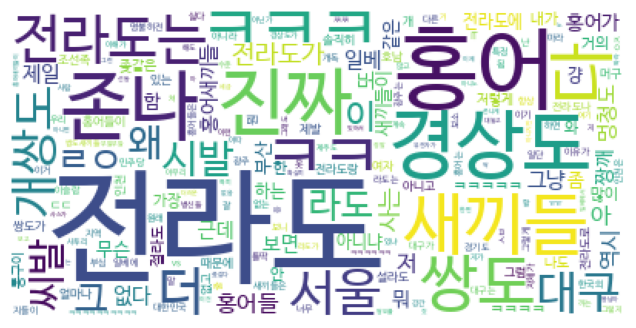

In [18]:
plt.figure(figsize = (10, 4))
plt.imshow(wc_rs)

plt.axis("off")
# plt.savefig("./data/지역혐오.png")

plt.show()

# 1. "전라도는", "전라도" → 서로 같은 의미를 가지는데, 컴퓨터에서는 다르게 인식하게 됨
# 2. "왜", "ㅋㅋㅋ" → 분석/정보전달에 있어서는 불필요한 용어들 → 불용어!

### 2. 텍스트 분류 - 머신러닝으로!

#### 텍스트 데이터 처리 프로세스
1. 정제(Cleaning) - 어간추출, 표준어화(정규화), 불용어 제거 등
2. 토큰화 - 토크나이저(기준)로 쪼개는 작업
    - 띄어쓰기, 형태소, n-gram 등
3. 수치화
    - 원핫인코딩, 라벨인코딩 등
    - BOW, TFIDF 등 (빈도 기반의 수치화)
    - 임베딩 (단어임베딩, 문장임베딩 등)

### 정제

In [19]:
import re
# Regular Expression (정규표현식)

In [20]:
# 전화번호 검출
p = re.compile(r"010-?[0-9]{4}-?\d{4}")

In [21]:
# 매칭
p.search("전화번호 : 0101234678")

#### 혐오표현 클렌징
- ㅋㅋㅋㅋ, ㅎㅎㅎㅎ 등과 같이 단순 반복 문자들은 삭제
- 한 글자 단어 삭제

In [22]:
# 패턴 생성
p = re.compile("[ㅋㅎㄷㅇ~!?.\-ㅡ0-9a-z]+") # [...] 내부에 포함된 문자 중 하나와 일치하면서, 반복(+)되는 경우를 의미

# 테스트용
# pattern = r"[^a-zA-Z0-9가-힣\s.?!]"

In [23]:
# sub() : replace()와 비슷
# re.sub(pattern, "", "ㅋㅋㅋㅋ 나의 가계부 지출 년 월 생활비 정산 만원 등등")

In [24]:
train_clean = []

for doc in train["문장"] :
    temp = []
    for token in doc.split(" ") :
        if len(token) < 2 : # 두 글자 미만인가?
            continue
        elif p.search(token) : # 정규표현식 패턴에 매칭되는가?
            continue
        temp.append(token)
    train_clean.append(" ".join(temp))

In [25]:
test_clean = []

for doc in test["문장"] :
    temp = []
    for token in doc.split(" ") :
        if len(token) < 2 : # 두 글자 미만인가?
            continue
        elif p.search(token) : # 정규표현식 패턴에 매칭되는가?
            continue
        temp.append(token)
    test_clean.append(" ".join(temp))

In [26]:
len(train_clean), len(test_clean)

(15005, 3737)

### 형태소 분석기
- 품사 기준 별로 쉽게 분석할 수 있도록 지원하는 도구

| 분석기    | 속도        | 정확도        | 특징                                                         | 장단점                                                         |
|-----------|-------------|---------------|--------------------------------------------------------------|----------------------------------------------------------------|
| **Mecab** | 매우 빠름   | 높음          | - 백터 기반의 빠른 분석<br>- 대용량 데이터 처리에 적합          | + **장점:** 속도 및 효율성 우수<br>- **단점:** 설치가 다소 복잡, 사전 관리 필요 |
| **Kkma**  | 느림        | 높음          | - 문장 단위의 세밀한 분석 제공<br>- 다양한 형태소 정보 리턴       | + **장점:** 상세 분석, 문맥 파악 용이<br>- **단점:** 속도 느림, 대용량 데이터에 부적합 |
| **Hannanum** | 보통     | 중간          | - KAIST 개발 분석기로 전통적 접근법 사용<br>- 기본 문법 규칙 기반  | + **장점:** 비교적 안정적인 결과 제공<br>- **단점:** 문맥 반영 미흡, 업데이트 한계  |
| **Komoran** | 보통       | 높음          | - 최신 알고리즘 일부 적용<br>- 딥러닝 요소 도입 가능             | + **장점:** 높은 정확도, 견고한 성능<br>- **단점:** 옵션 및 커스터마이징 제한       |
| **Okt**   | 빠름        | 중간 ~ 높음   | - 소셜 미디어(예: 트위터) 문체에 최적화<br>- 감성 분석 등 특화       | + **장점:** 사용법 간편, 빠른 처리<br>- **단점:** 복잡한 문장 분석에는 한계, 단어 세분화 미흡 |

---

| 형태소 분석기                | 주요 메서드 및 인자                                            | 인자 설명                                                                                                 |
|-----------------------------|--------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
| **Hannanum**                | - `pos(phrase, ntags=9, flatten=True)`                         | - **ntags**: 태그의 상세도를 지정 (일반적으로 9 또는 22 사용) <br> - **flatten**: 결과를 단일 리스트로 반환 여부  |
|                             | - `analyze(phrase)`                                             | - 후보 분석 결과(여러 형태소 분석 후보)를 반환                                                              |
| **Kkma**                    | - `pos(phrase, flatten=True)`                                  | - **flatten**: 결과를 평탄화하여 하나의 리스트로 반환                                                         |
|                             | - `sentences(phrase)`                                          | - 입력 텍스트를 문장 단위로 분리하여 리스트로 반환                                                            |
|                             | - `nouns(phrase)`, `morphs(phrase)`                              | - 각각 명사와 모든 형태소만을 추출                                                                           |
| **Komoran**                 | - `pos(phrase, flatten=True)`                                  | - **flatten**: 결과를 단일 리스트로 반환 여부                                                                 |
|                             | - `nouns(phrase)`, `morphs(phrase)`                              | - 각각 명사와 모든 형태소만을 추출                                                                           |
| **Mecab**                   | - `pos(phrase, flatten=True)`                                  | - **flatten**: 결과를 평탄화하여 하나의 리스트로 반환                                                         |
|                             | - `nouns(phrase)`, `morphs(phrase)`                              | - 각각 명사와 모든 형태소만을 추출                                                                           |
| **Okt (Open Korean Text)**  | - `pos(phrase, norm=False, stem=False)`                        | - **norm**: 정규화 여부 (예: 숫자, 영문 등의 표준 형태로 변환할지 결정) <br> - **stem**: 어간 추출 여부 (어근화)  |
|                             | - `phrases(phrase)`                                            | - 텍스트 내 구(phrase)를 추출                                                                               |
|                             | - `nouns(phrase)`, `morphs(phrase)`                              | - 각각 명사와 모든 형태소만을 추출                                                                           |

In [27]:
from konlpy.tag import Okt, Kkma, Mecab

In [28]:
okt = Okt()
kkma = Kkma()
mecab = Mecab()

In [29]:
# 형태소 분리
okt.morphs("아버지가 방에 들어가신다")

['아버지', '가', '방', '에', '들어가신다']

In [30]:
# 품사 부착 (pos tagging)
okt.pos("아버지가 방에 들어가신다")

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb')]

In [31]:
# okt 품사 기준 확인
len(okt.tagset)

19

In [32]:
# kkma 품사 기준 확인
len(kkma.tagset)

67

In [33]:
kkma.pos("아버지가 방에 들어가신다")

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]

In [34]:
# okt → 정규화, 어간 추출
okt.pos(
    "어제는 저녁을 맛있게 먹었닼ㅋㅋㅋㅋㅋㅋ",
    norm = True, # 정규화(표준어화)
    stem = True  # 어간추출
)

[('어제', 'Noun'),
 ('는', 'Josa'),
 ('저녁', 'Noun'),
 ('을', 'Josa'),
 ('맛있다', 'Adjective'),
 ('먹다', 'Verb'),
 ('ㅋㅋㅋ', 'KoreanParticle')]

In [35]:
# 명사만 추출
okt.nouns("아버지가 방에 들어가신다")

['아버지', '방']

In [36]:
train_clean[741]
# 이모지 → error가 발생 (가끔 형태소 분석기에 인식이 안 되는 경우가 있음)
# 이모지 외에도 감정이라던지 문맥을 가지고 있는 요소들은 텍스트들이 있음

'😠😠교회가면 여자는 목사에게 몸부터 치네 더럽다😓강간ㆍ성폭행ㆍ모든 종교가 인간을 종교팔이해 수백억지원 중단하고 마누라 딸을 교회에 보내지마라 먹이다'

- 이모지 제거

In [37]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.8 MB/s eta 0:00:00


In [38]:
import emoji

In [39]:
# 이모지를 빈 문자열로 대체
emoji.replace_emoji(train_clean[741], replace = "")

'교회가면 여자는 목사에게 몸부터 치네 더럽다강간ㆍ성폭행ㆍ모든 종교가 인간을 종교팔이해 수백억지원 중단하고 마누라 딸을 교회에 보내지마라 먹이다'

In [40]:
from tqdm.auto import tqdm

```python
# 클렌징 작업 (형태소 분석기 + 이모지 제거)

konlpy_morphs = []

for doc in tqdm(train_clean) :
    cleaned_doc = emoji.replace_emoji(doc, replace = "")
    rs = kkma.morphs(cleaned_doc)
    konlpy_morphs.append(" ".join(rs))

# kkma 속도 너무 느림 -> mecab으로 대체
# 불용어 제거 추가
```

### Kiwi

In [41]:
!pip -q install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.5/35.5 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 18.3 MB/s eta 0:00:00


In [42]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [43]:
# 품사 태깅
kiwi.tokenize("아버지가 방에 들어가신다")

[Token(form='아버지', tag='NNG', start=0, len=3),
 Token(form='가', tag='JKS', start=3, len=1),
 Token(form='방', tag='NNG', start=5, len=1),
 Token(form='에', tag='JKB', start=6, len=1),
 Token(form='들어가', tag='VV', start=8, len=3),
 Token(form='시', tag='EP', start=11, len=1),
 Token(form='ᆫ다', tag='EF', start=11, len=2)]

#### 불용어 처리 적용

In [44]:
from kiwipiepy.utils import Stopwords

stopwords = Stopwords()

In [45]:
kiwi.tokenize(
    "분석 결과에서 불용어만 제외하고 출력할 수 있다.",
    stopwords = stopwords
)

[Token(form='분석', tag='NNG', start=0, len=2),
 Token(form='결과', tag='NNG', start=3, len=2),
 Token(form='불', tag='NNG', start=8, len=1),
 Token(form='용어', tag='NNG', start=9, len=2),
 Token(form='제외', tag='NNG', start=13, len=2),
 Token(form='출력', tag='NNG', start=18, len=2),
 Token(form='있', tag='VA', start=24, len=1)]

In [46]:
stopwords.add(("있", "VA"))

In [47]:
kiwi.tokenize(
    "분석 결과에서 불용어만 제외하고 출력할 수 있다.",
    stopwords = stopwords
)

[Token(form='분석', tag='NNG', start=0, len=2),
 Token(form='결과', tag='NNG', start=3, len=2),
 Token(form='불', tag='NNG', start=8, len=1),
 Token(form='용어', tag='NNG', start=9, len=2),
 Token(form='제외', tag='NNG', start=13, len=2),
 Token(form='출력', tag='NNG', start=18, len=2)]

In [48]:
# 등록된 불용어 사전 확인
stopwords.stopwords

{('ᆫ', 'ETM'),
 ('ᆫ', 'JX'),
 ('ᆫ다', 'EF'),
 ('ᆯ', 'ETM'),
 ('가', 'JKS'),
 ('같', 'VA'),
 ('것', 'NNB'),
 ('게', 'EC'),
 ('겠', 'EP'),
 ('고', 'EC'),
 ('고', 'JKQ'),
 ('과', 'JC'),
 ('과', 'JKB'),
 ('그', 'MM'),
 ('그', 'NP'),
 ('기', 'ETN'),
 ('까지', 'JX'),
 ('나', 'NP'),
 ('년', 'NNB'),
 ('는', 'ETM'),
 ('는', 'JX'),
 ('다', 'EC'),
 ('다', 'EF'),
 ('다고', 'EC'),
 ('다는', 'ETM'),
 ('대하', 'VV'),
 ('더', 'MAG'),
 ('던', 'ETM'),
 ('도', 'JX'),
 ('되', 'VV'),
 ('되', 'XSV'),
 ('들', 'XSN'),
 ('등', 'NNB'),
 ('따르', 'VV'),
 ('때', 'NNG'),
 ('때문', 'NNB'),
 ('라', 'EC'),
 ('라는', 'ETM'),
 ('로', 'JKB'),
 ('를', 'JKO'),
 ('만', 'JX'),
 ('만', 'NR'),
 ('말', 'NNG'),
 ('며', 'EC'),
 ('면', 'EC'),
 ('면서', 'EC'),
 ('명', 'NNB'),
 ('받', 'VV'),
 ('보', 'VV'),
 ('부터', 'JX'),
 ('사람', 'NNG'),
 ('성', 'XSN'),
 ('수', 'NNB'),
 ('아니', 'VCN'),
 ('않', 'VX'),
 ('어', 'EC'),
 ('어', 'EF'),
 ('어서', 'EC'),
 ('어야', 'EC'),
 ('없', 'VA'),
 ('었', 'EP'),
 ('에', 'JKB'),
 ('에게', 'JKB'),
 ('에서', 'JKB'),
 ('와', 'JC'),
 ('와', 'JKB'),
 ('우리', 'NP'),
 ('원', 'NNB'),


In [49]:
# 띄어쓰기 교정
kiwi.space("띄어쓰기없이작성된텍스트네이걸교정 해")

'띄어쓰기 없이 작성된 텍스트네 이걸 교정해'

### 클렌징 (이모지 제거, 형태소 분리, 불용어 제거)

In [50]:
stopwords_list = [ word[0] for word in stopwords.stopwords ]

In [51]:
stopwords_list

['게',
 '기',
 '는',
 '며',
 '하',
 '에',
 '과',
 '어',
 '다',
 '보',
 '라는',
 '은',
 '나',
 '만',
 '있',
 '따르',
 '가',
 '주',
 '그',
 '때문',
 '성',
 '와',
 '로',
 '까지',
 '원',
 '않',
 '라',
 '있',
 '면서',
 '은',
 '었',
 '지역',
 '하',
 '지',
 '등',
 '과',
 'ᆫ',
 '더',
 '이',
 '받',
 '어',
 '우리',
 'ᆯ',
 '중',
 '아니',
 '하',
 '제',
 'ᆫ',
 '일',
 '그',
 '면',
 '에서',
 '어서',
 '화',
 '들',
 '고',
 '하',
 '것',
 '에게',
 '같',
 '년',
 '되',
 '지',
 '만',
 '통하',
 '적',
 '월',
 '다',
 '일',
 '이',
 '지만',
 '이',
 '한',
 '다는',
 '사람',
 '명',
 '되',
 '와',
 '위하',
 '때',
 '고',
 '을',
 '없',
 '이',
 '있',
 '는',
 '이',
 '으로',
 '던',
 '다고',
 'ᆫ다',
 '겠',
 '말',
 '부터',
 '대하',
 '을',
 '도',
 '수',
 '어야',
 '를',
 '의']

In [52]:
# 함수 정의
def clean_and_tokenize(text, tokenizer = Mecab()) :
    # 1. 이모지 제거
    text = emoji.replace_emoji(text)

    # 2. 형태소 분리
    tokenized_text = tokenizer.morphs(text)

    # 3. 불용어 제거
    temp = []
    for token in tokenized_text :
        if token not in stopwords_list : # 들어있지 않는 경우에만 temp에 쌓겠다!
            temp.append(token)

    return " ".join(temp)

In [56]:
clean_and_tokenize(train_clean[5])

'고향 서 피 방가 동네 부럴 친구 이랑 거르 없이 이야기 니까 더라 당연히 키보드 치 거나 그러 는데 많이 거칠 긴 반성 해야 네'

In [58]:
# re 적용된 데이터에 사용자 함수 적용(이모지 제거, 형태소 분리, 불용어 제거)
konlpy_morphs_train = []
for doc in tqdm(train_clean) :
    konlpy_morphs_train.append(clean_and_tokenize(doc))

konlpy_morphs_test = [ clean_and_tokenize(doc) for doc in tqdm(test_clean) ]

  0%|          | 0/15005 [00:00<?, ?it/s]

  0%|          | 0/3737 [00:00<?, ?it/s]

In [59]:
konlpy_morphs_train[:5]

['일안 시간 쉬 싶 그런 아닐까',
 '아동 성범죄 페도버는 기록 바 끊 져 영원히 고통 무슬림 IQ 떨어지 출산 위험',
 '루나 솔로 앨범 나왔 머 모 기운 음 진짜 띵 곡 임 셈 "',
 '홍 팍 어버이 연합 인가 보내 요 이런 뎃글 는데 이거 어버이 연합 측 신고 그쪽 고소',
 '아 놔 여기 댓 여자 김치 녀 라고 먼저 여자 심하 이렇게 내 둘 나쁜 이상 이하 아닌데']

### 수치화

#### BOW (Bag of Word)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer # BOW 도구

In [61]:
# 원본 데이터 적용 전, 예시
sample_text = ["나는 오늘 저녁에 치킨을 먹을거야",
               "너는 오늘 저녁에 무엇을 먹을꺼니?",
               "나는 오늘 아침에 운동을 하고 왔어",
               "어제 저녁에 운동을 했더니, 배가 많이 고프다."
              ]

In [62]:
# 1. 단어사전 구축 (기준잡기)
sample_cv = CountVectorizer()
sample_cv.fit(sample_text)

CountVectorizer()

In [64]:
# 단어사전 확인
sample_cv.vocabulary_ # {채택된 단어 : 열번호,...}

{'나는': 1,
 '오늘': 10,
 '저녁에': 13,
 '치킨을': 14,
 '먹을거야': 4,
 '너는': 2,
 '무엇을': 6,
 '먹을꺼니': 5,
 '아침에': 8,
 '운동을': 12,
 '하고': 15,
 '왔어': 11,
 '어제': 9,
 '했더니': 16,
 '배가': 7,
 '많이': 3,
 '고프다': 0}

In [65]:
# 2. 변환
result = sample_cv.transform(sample_text)

In [70]:
pd.DataFrame(result.toarray(), columns = sample_cv.get_feature_names_out())

,고프다,나는,너는,많이,먹을거야,먹을꺼니,무엇을,배가,아침에,어제,오늘,왔어,운동을,저녁에,치킨을,하고,했더니
0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0
3,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1


In [71]:
sample_text

['나는 오늘 저녁에 치킨을 먹을거야',
 '너는 오늘 저녁에 무엇을 먹을꺼니?',
 '나는 오늘 아침에 운동을 하고 왔어',
 '어제 저녁에 운동을 했더니, 배가 많이 고프다.']

### TF-IDF

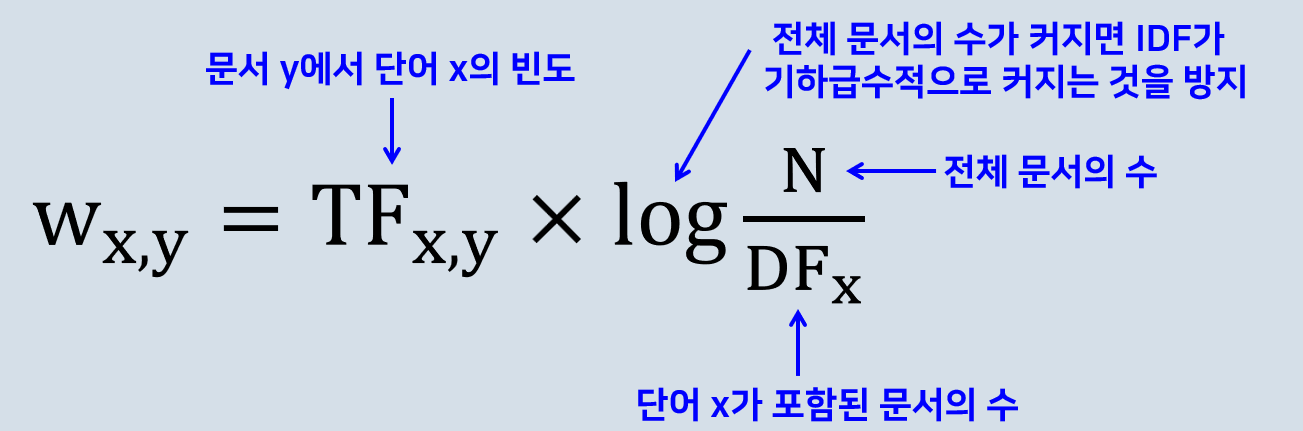

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
sample_tf_idf = TfidfVectorizer()
sample_tf_idf.fit(sample_text)

TfidfVectorizer()

In [74]:
result = sample_tf_idf.transform(sample_text)

In [75]:
pd.DataFrame(result.toarray(), columns = sample_tf_idf.get_feature_names_out())

,고프다,나는,너는,많이,먹을거야,먹을꺼니,무엇을,배가,아침에,어제,오늘,왔어,운동을,저녁에,치킨을,하고,했더니
0,0.000000,0.425305,0.000000,0.000000,0.539445,0.000000,0.000000,0.000000,0.000000,0.000000,0.344321,0.000000,0.000000,0.344321,0.539445,0.000000,0.000000
1,0.000000,0.000000,0.511992,0.000000,0.000000,0.511992,0.511992,0.000000,0.000000,0.000000,0.326798,0.000000,0.000000,0.326798,0.000000,0.000000,0.000000
2,0.000000,0.365594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.463709,0.000000,0.295980,0.463709,0.365594,0.000000,0.000000,0.463709,0.000000
3,0.407265,0.000000,0.000000,0.407265,0.000000,0.000000,0.000000,0.407265,0.000000,0.407265,0.000000,0.000000,0.321093,0.259952,0.000000,0.000000,0.407265


In [76]:
sample_text

['나는 오늘 저녁에 치킨을 먹을거야',
 '너는 오늘 저녁에 무엇을 먹을꺼니?',
 '나는 오늘 아침에 운동을 하고 왔어',
 '어제 저녁에 운동을 했더니, 배가 많이 고프다.']

- 원본데이터 수치화

In [77]:
unsmile_cv = CountVectorizer(
#    stop_words = stopwords_list, # 불용어 제거
    ngram_range = (1, 2), # 1그램(유니그램), 2그램(바이그램), 3그램(트라이그램)
                          # 단어 간의 관계를 더 잘 반영
    max_df = 0.7,         # 최대 등장 -> 전체 문서 중 70% 이상에서 등장하는 단어는 무시
    min_df = 10           # 최소 등장 -> 특정 단어가 적어도 10개 이상의 문서에서 등장해야 단어를 채택
)

unsmile_tf_idf = TfidfVectorizer(
    ngram_range = (1, 2),
    max_df = 0.7,
    min_df = 10
)

In [78]:
# 단어사전 구축
unsmile_cv.fit(konlpy_morphs_train)
unsmile_tf_idf.fit(konlpy_morphs_train)

TfidfVectorizer(max_df=0.7, min_df=10, ngram_range=(1, 2))

In [79]:
# 단어사전의 크기 - 벡터의 모양(크기)
len(unsmile_tf_idf.vocabulary_)

1785

In [80]:
# 변환
X_train_BOW = unsmile_cv.transform(konlpy_morphs_train)
X_test_BOW = unsmile_cv.transform(konlpy_morphs_test)

X_train_TFIDF = unsmile_tf_idf.transform(konlpy_morphs_train)
X_test_TFIDF = unsmile_tf_idf.transform(konlpy_morphs_test)

In [81]:
X_train_TFIDF

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 67530 stored elements and shape (15005, 1785)>

In [82]:
train

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,께롱께롱께롱!!!,0,0,0,0,0,0,0,0,0,1,0
15001,갱상도가아니라 홍어지 개좃같은 홍어년들,0,0,0,0,0,1,0,0,0,0,0
15002,말레이시아랑 인도네시아 여자 존나 못생겼던데,1,0,0,1,0,0,0,0,0,0,0
15003,링크도 안박고 가서 글 쓰자고 선동하네,0,0,0,0,0,0,0,0,1,0,0


### 정답데이터 추출
- 혐오표현 : 0
- 악플&욕설 : 1
- clean : 2
- 개인지칭은 제외

In [86]:
# 혐오표현들에 대한 라벨 병합
train["혐오표현"] = train.loc[:, "여성/가족":"기타 혐오"].sum(axis = 1)
test["혐오표현"] = test.loc[:, "여성/가족":"기타 혐오"].sum(axis = 1)

In [88]:
train.head(3)

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭,혐오표현
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0,1
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0,0


In [92]:
# 새로운 데이터셋
new_train = train[["문장", "혐오표현", "악플/욕설", "clean"]]
new_test = test[["문장", "혐오표현", "악플/욕설", "clean"]]

In [93]:
new_train

,문장,혐오표현,악플/욕설,clean
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,1
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,1,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,1
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,1
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0
...,...,...,...,...
15000,께롱께롱께롱!!!,0,0,1
15001,갱상도가아니라 홍어지 개좃같은 홍어년들,1,0,0
15002,말레이시아랑 인도네시아 여자 존나 못생겼던데,2,0,0
15003,링크도 안박고 가서 글 쓰자고 선동하네,0,1,0


In [98]:
# 사용자 함수 정의
def label(row) :
    if row["혐오표현"] > 0 :
        return 0
    elif row["악플/욕설"] > 0 :
        return 1
    else : # clean
        return 2

In [97]:
new_train.iloc[3]

,3
문장,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...
혐오표현,0
악플/욕설,0
clean,1


In [100]:
y_train = new_train.apply(label, axis = 1)
y_test = new_test.apply(label, axis = 1)

### 분류 모델링

In [102]:
from sklearn.linear_model import LogisticRegression # 선형 분류 모델
from sklearn.model_selection import cross_val_score

In [103]:
# 성능 비교

logi = LogisticRegression(max_iter = 10000)

score_BOW = cross_val_score(logi, X_train_BOW, y_train, cv = 5)
score_TFIDF = cross_val_score(logi, X_train_TFIDF, y_train, cv = 5)

In [106]:
score_BOW.mean()

np.float64(0.6467844051982672)

In [107]:
score_TFIDF.mean()

np.float64(0.6491169610129957)

### BOW, TFIDF의 문장 벡터화(수치화) 한계
1. 순서를 고려하지 않음!
2. 분석하려는 모든 토큰에 숫자를 붙여야 함 -> 불필요한 "0"이라는 숫자가 많아짐 → 차원의 크기가 불필요하게 커짐

- 문장, 문단 등의 문서들은 대부분 임베딩 수행 → 희소표현이 아닌, 밀집표현으로 많이 활용

### PipeLine 구성, 하이퍼 파라미터 튜닝 도구

In [108]:
from sklearn.pipeline import Pipeline # 기능 연결 도구
from sklearn.model_selection import GridSearchCV # 초매개변수 튜닝 도구

In [109]:
# 그리드서치 순서
# 1. 객체 초기화 - 파이프라인 구성
unsmile_pipeline = Pipeline([
    ("unsmile_TFIDF", TfidfVectorizer(stop_words = stopwords_list)),
    ("unsmile_logi", LogisticRegression(max_iter = 10000))
])

In [110]:
# 2. 하이퍼파라미터 정의 - 경우의 수 설정
grid_params = {
    "unsmile_TFIDF__max_df": [0.5, 0.7, 0.8],
    "unsmile_TFIDF__min_df": [3, 5, 7, 10],
    "unsmile_TFIDF__ngram_range": [(1, 1), (1, 2), (1, 3)],
    "unsmile_logi__C": [0.01, 0.1, 1, 10], # 규제 강도(규제화의 역수, 작은 값일수록 파라미터들에게 규제를 강하게 검)
}

In [111]:
# 3. 그리드서치 객체 초기화
grid = GridSearchCV(
    unsmile_pipeline,
    grid_params,
    cv = 3,
    n_jobs = -1       # 모든 CPU 코어를 사용해서 병렬 처리
#   scoring = "recall"
)

In [112]:
# 4. 찾아라! - 144가지의 모델들을 만들고 학습해서 교차검증으로 기록하고 비교
grid.fit(konlpy_morphs_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('unsmile_TFIDF',
                                        TfidfVectorizer(stop_words=['게', '기',
                                                                    '는', '며',
                                                                    '하', '에',
                                                                    '과', '어',
                                                                    '다', '보',
                                                                    '라는', '은',
                                                                    '나', '만',
                                                                    '있', '따르',
                                                                    '가', '주',
                                                                    '그', '때문',
                                                                    '성', '와',
                                                                    '로', '까지',
                                                                    '원', '않',
                                                                    '라', '있',
                                                                    '면서', '은', ...])),
                                       ('unsmile_logi',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'unsmile_TFIDF__max_df': [0.5, 0.7, 0.8],
                         'unsmile_TFIDF__min_df': [3, 5, 7, 10],
                         'unsmile_TFIDF__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'unsmile_logi__C': [0.01, 0.1, 1, 10]})

In [113]:
grid.best_score_ # 최고의 성능값 - 분류모델이니까 정확도

np.float64(0.6485172111252813)

In [114]:
grid.best_params_ # 최고의 성능을 나타냈을 때 세팅되었던 하이퍼파라미터값

{'unsmile_TFIDF__max_df': 0.5,
 'unsmile_TFIDF__min_df': 5,
 'unsmile_TFIDF__ngram_range': (1, 3),
 'unsmile_logi__C': 1}

In [116]:
best_model = grid.best_estimator_

### 테스트

In [117]:
from sklearn.metrics import classification_report

In [118]:
y_pred = best_model.predict(konlpy_morphs_test)

In [121]:
print(classification_report(y_test, y_pred, target_names = ["혐오표현", "악플/욕설", "clean"]))

              precision    recall  f1-score   support

        혐오표현       0.74      0.85      0.79      2016
       악플/욕설       0.53      0.28      0.37       786
       clean       0.54      0.58      0.56       935

    accuracy                           0.66      3737
   macro avg       0.60      0.57      0.57      3737
weighted avg       0.64      0.66      0.64      3737

